In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import curve_fit
from gekko import GEKKO
from IPython.display import display, HTML

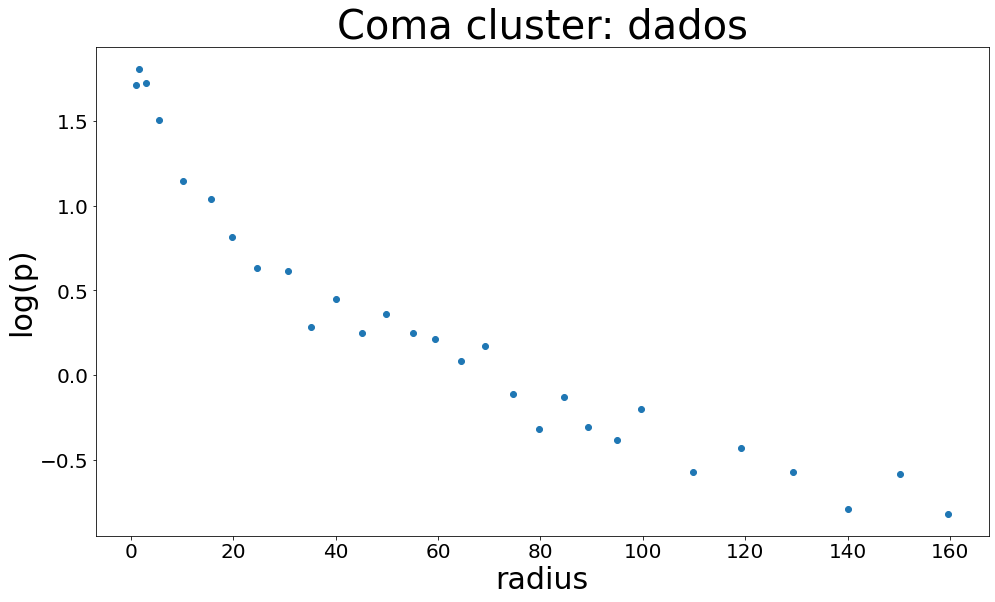

In [3]:
folder_name = 'coma_cluster.txt'
data = pd.read_table('/home/victor/Desktop/Code/IC/data/'+folder_name,header = None,sep = ' ')
plt.figure(figsize=(16,9))
plt.title("Coma cluster: dados",fontsize=40)
plt.ylabel("log(p)",fontsize=30)
plt.xlabel("radius",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(data[0],data[1],'o')

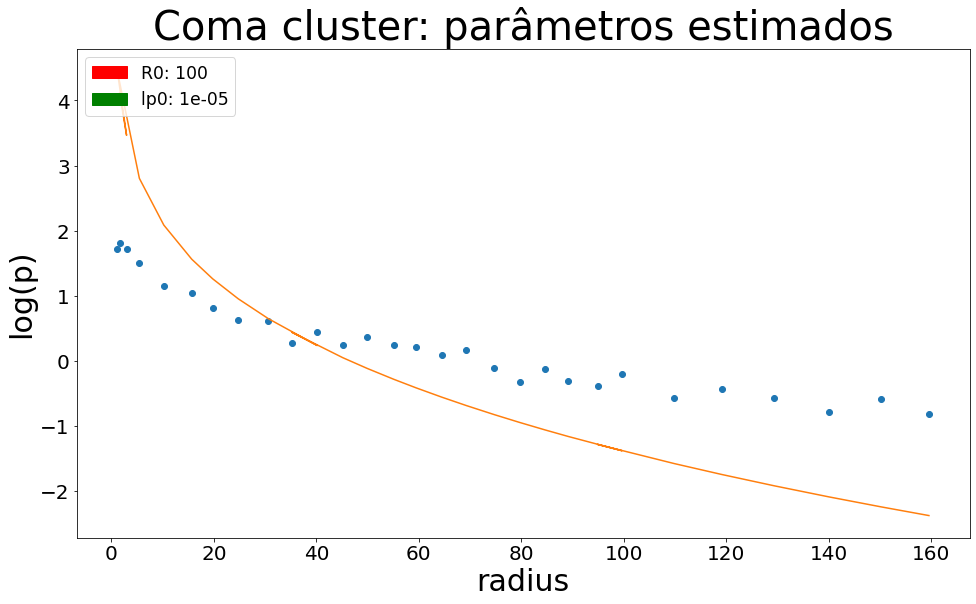

In [4]:
def lpr(r,R0,lp0):
    return  lp0 - np.log(r/R0) -2*np.log(1+r/R0)   # lpr is log(p(r)) and lp0 is log(p0)
    
g = [[100,0.00001]]

n = len(data[0])
y = np.empty(n)

rs = data[0].values #velocities
lprs = data[1].values #radiuses

plt.figure(figsize=(16,9))
plt.title("Coma cluster: parâmetros estimados",fontsize=40)

for const in g:

    for i in range(n):
        y[i] = lpr(data[0][i],const[0],const[1])
    
        
    R0 = mpatches.Patch(color='red',label='R0: '+str(const[0]))
    lp0 = mpatches.Patch(color='green',label='lp0: '+str(const[1]))

    plt.legend(handles=[R0,lp0],fontsize='xx-large',loc='upper left')
    
    plt.ylabel("log(p)",fontsize=30)
    plt.xlabel("radius",fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.plot(rs,lprs,'o')
    plt.plot(rs,y)
    plt.show()

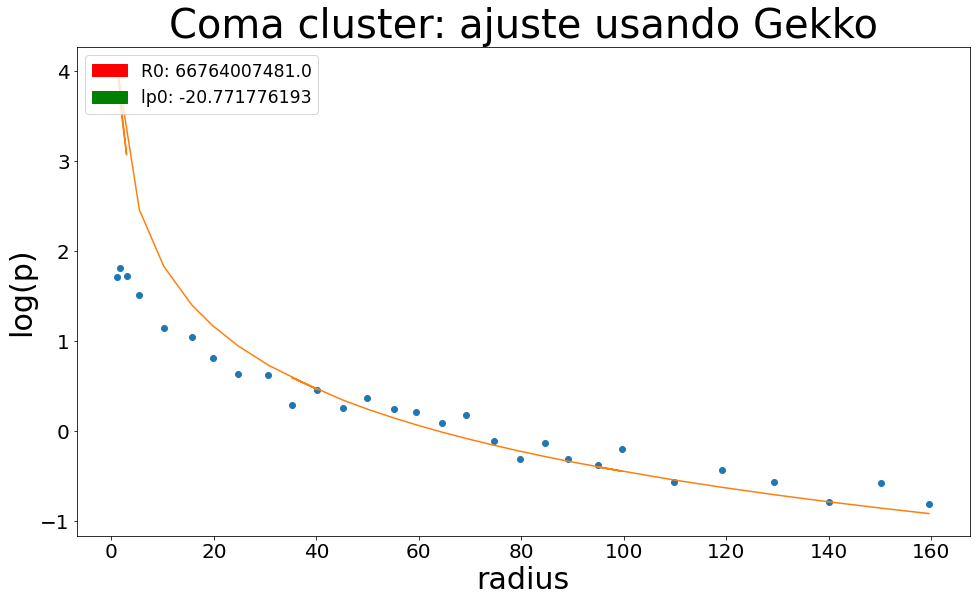

In [5]:
#https://gekko.readthedocs.io/en/latest/examples.html

g = [100,0.00001]

m = GEKKO()

r = m.Param(value = rs)

lp0 = m.FV(value = g[0])
lp0.STATUS = 1

R0 = m.FV(value = g[1])
R0.STATUS = 1

lp = m.CV(value = lprs)
lp.FSTATUS = 1

m.Equation( lp == lp0 - m.log(r/R0) -2*m.log(1+r/R0) )

m.options.IMODE = 2
m.solve(disp=False)

plt.figure(figsize=(16,9))
plt.title("Coma cluster: ajuste usando Gekko",fontsize=40)

_R0 = mpatches.Patch(color='red',label='R0: '+str(R0.value[0]))
_lp0 = mpatches.Patch(color='green',label='lp0: '+str(lp0.value[0]))

plt.legend(handles=[_R0,_lp0],fontsize='xx-large',loc='upper left')

plt.ylabel("log(p)",fontsize=30)
plt.xlabel("radius",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(rs,lprs,'o')
plt.plot(rs,lp.value)
plt.show()

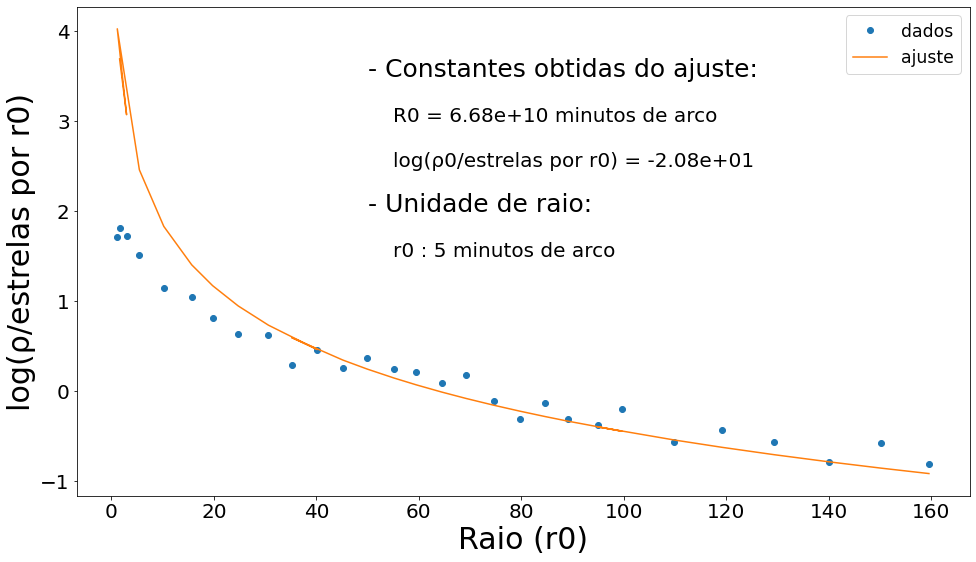

In [7]:
def lpr(r,R0,lp0):
    return  lp0 - np.log(r/R0) -2*np.log(1+r/R0)   # lpr is log(p(r)) and lp0 is log(p0)

#g = [66764007481.0,-20.771776193]
g = [R0.value[0],lp0.value[0]]

n = len(data[0])
y = np.empty(n)
for i in range(n):
    y[i] = lpr(data[0][i],g[0],g[1])

rs = data[0].values #velocities
lprs = data[1].values #radiuses

plt.figure(figsize=(16,9))

plt.ylabel("log(ρ/estrelas por r0)",fontsize=30)
plt.xlabel("Raio (r0)",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(rs,lprs,'o',label="dados")
plt.plot(rs,y,label="ajuste")
plt.text(50,3.5,"- Constantes obtidas do ajuste:",fontsize=25)
plt.text(55,3,'R0 = '+str("{:.2e}".format(R0.value[0]))+" minutos de arco",fontsize=20)
plt.text(55,2.5,'log(ρ0/estrelas por r0) = '+str("{:.2e}".format(lp0.value[0])),fontsize=20)
plt.text(50,2,"- Unidade de raio:",fontsize=25)
plt.text(55,1.5,"r0 : 5 minutos de arco",fontsize=20)
plt.legend(fontsize='xx-large')
plt.show()